# Stock Prediction Models Project - BSFM - GROUP 8

### Calin-Rares Manta & Arina Ardeleanu

## The first steps

### Project Libraries

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

### Reading the .csv file

In [333]:
# Opening the file
df = pd.read_csv("data/PLTR_HistoricalData.csv")

# Reading the first 5 rows
df.head()

,Date,PX_OPEN,ChangeO,% ChangeO,PX_LAST,ChangeL,% ChangeL,PX_LOW,PX_HIGH,PX_MID,...,BEst_EPS,PX_TO_BOOK_RATIO,EBIT,ROE,ROA,EARN_YLD_HIST,PUT_CALL_VOLUME_RATIO_CUR_DAY,SHORT_INT_RATIO,BETA_ADJ_OVERRIDABLE,BETA_RAW_OVERRIDABLE
0,2/28/25,79.98,-11.93,-12.980089,84.92,0.15,0.176949,78.58,85.18,84.915,...,NaN,39.6961,11.043,10.9022,8.5092,0.2313,0.7442,NaN,2.0358,2.5537
1,2/27/25,91.91,2.75,3.084343,84.77,-4.54,-5.083417,84.17,93.62,84.770,...,NaN,39.6260,113.140,12.3976,8.5092,0.2317,0.8231,NaN,2.0508,2.5763
2,2/26/25,89.16,-1.49,-1.643685,89.31,1.47,1.673497,87.59,91.69,89.330,...,NaN,41.7482,113.140,12.3976,8.5092,0.2199,0.6235,NaN,2.0460,2.5690
3,2/25/25,90.65,-5.23,-5.454735,87.84,-2.84,-3.131892,85.25,91.70,87.845,...,NaN,41.0611,113.140,12.3976,8.5092,0.2236,0.9176,NaN,2.0462,2.5693
4,2/24/25,95.88,-11.80,-10.958395,90.68,-10.67,-10.527874,89.30,99.01,90.665,...,NaN,42.3886,113.140,12.3976,8.5092,0.2166,1.1069,NaN,2.0426,2.5639


### Converting the date and sorting from oldest to newest

In [335]:
df['Date'] = pd.to_datetime(df['Date']) #conversion to date format
df = df.sort_values('Date') #sorting of date
df = df.reset_index(drop=True) #resetting the index (for appearance)

df.head()

/var/folders/qr/x5t14c092n92c7lr8pv2b3cw0000gn/T/ipykernel_9481/4215779417.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']) #conversion to date format


,Date,PX_OPEN,ChangeO,% ChangeO,PX_LAST,ChangeL,% ChangeL,PX_LOW,PX_HIGH,PX_MID,...,BEst_EPS,PX_TO_BOOK_RATIO,EBIT,ROE,ROA,EARN_YLD_HIST,PUT_CALL_VOLUME_RATIO_CUR_DAY,SHORT_INT_RATIO,BETA_ADJ_OVERRIDABLE,BETA_RAW_OVERRIDABLE
0,2020-09-30,10.00,NaN,NaN,9.50,NaN,NaN,9.11,11.42,9.505,...,NaN,13.1044,-99.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,9.69,NaN,NaN,9.46,NaN,NaN,9.23,10.10,9.445,...,NaN,13.0493,-99.145,NaN,NaN,NaN,NaN,NaN,71.1589,106.2394
2,2020-10-02,9.06,NaN,NaN,9.20,NaN,NaN,8.94,9.28,9.185,...,NaN,12.6906,-99.145,NaN,NaN,NaN,NaN,NaN,9.2217,13.3327
3,2020-10-05,9.43,NaN,NaN,9.03,NaN,NaN,8.92,9.49,9.035,...,NaN,12.4561,-99.145,NaN,NaN,NaN,NaN,NaN,2.1133,2.6699
4,2020-10-06,9.04,NaN,NaN,9.90,NaN,NaN,8.90,10.18,9.905,...,NaN,13.6562,-99.145,NaN,NaN,NaN,0.1673,NaN,0.8663,0.7994


## Missing Values

### Checking what is there

<Axes: >

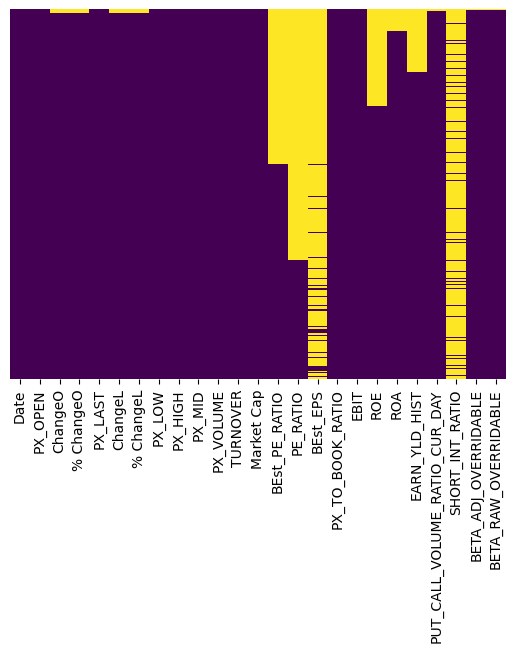

In [338]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

### Removing columns with mostly missing values:

In [340]:
df = df.drop(['BEst_EPS', 'SHORT_INT_RATIO'], axis=1) 

In [341]:
df = df.dropna(how='all') #removing rows with no information

### Checking the data again

<Axes: >

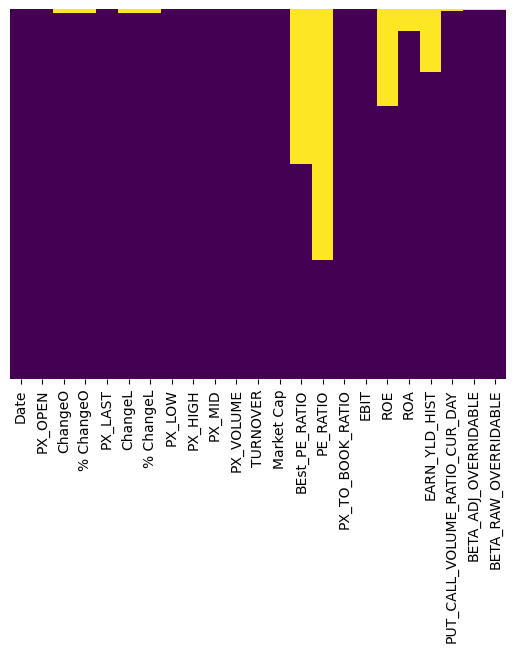

In [343]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

### More data selection decisions

Currently I have to decide if I want to drop rows or columns, depending on how useful some ratios are. For now I'm removing the P/E ratios (both the Bloomberg Expected and the regular one).

In [346]:
df = df.drop(['BEst_PE_RATIO', 'PE_RATIO'], axis=1) 

I'll try to use P/B instead of P/E to understand how investors are feeling, due to the fact it has more data.

Since data regarding ROE, ROA and Earnings Yield is missing near the start of the stock, I will remove those rows LATER (after adding the moving average features, as they create missing data in their own columns), and work with the rest.

In [349]:
# df = df.dropna() #removes all rows with ANY missing data

Checking again...

<Axes: >

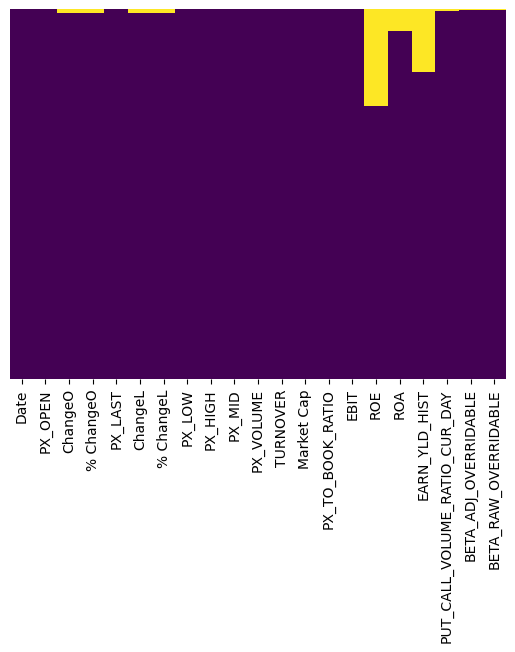

In [351]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

## Feature Engineering

### Creation of new features

In [354]:
# Creating a Daily Range column
df['Daily_Range'] = df['PX_HIGH'] - df['PX_LOW']

In [355]:
# Creating 10Day & 20Day moving averages for the closing price, the daily range and the volume.
df['10D_Moving_Avg_Close'] = df['PX_LAST'].rolling(window=10).mean()
df['20D_Moving_Avg_Close'] = df['PX_LAST'].rolling(window=20).mean()

df['10D_Moving_Avg_Daily_Range'] = df['Daily_Range'].rolling(window=10).mean()
df['20D_Moving_Avg_Daily_Range'] = df['Daily_Range'].rolling(window=20).mean()

df['10D_Moving_Avg_Volume'] = df['PX_VOLUME'].rolling(window=10).mean()
df['20D_Moving_Avg_Volume'] = df['PX_VOLUME'].rolling(window=20).mean()

### Figuring out the correlation of various elements with the % change in the stock's price

Since I calculated the daily range and I already have %ChangeL (the change in price at the end of the day), I will remove various categories which aren't needed for the model

In [358]:
df = df.drop(['ChangeL', '% ChangeO', 'ChangeO', 'Date'], axis=1)

df = df.dropna() # Drop rows with NaN values created by rolling calculations

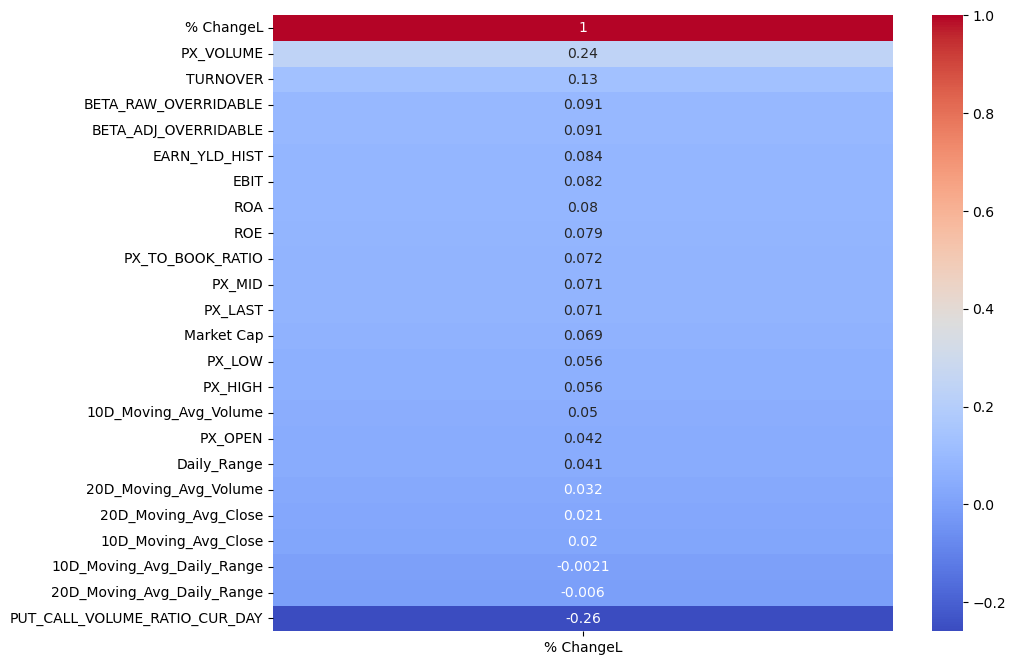

In [359]:
corr_matrix = df.corr()

# Create a heatmap of correlation with %Change
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['% ChangeL']].sort_values(by='% ChangeL', ascending=False), annot=True, cmap='coolwarm')
plt.show()

In [360]:
# Excluding '% ChangeL' column from the dataset
X = df.drop(columns=['% ChangeL'])  
y = df['% ChangeL']  # The target

# Filter features based on correlation threshold
corr_matrix = df.corr()
low_corr_threshold = 0.04  # Threshold for correlation
high_corr_features = corr_matrix.index[(abs(corr_matrix['% ChangeL']) >= low_corr_threshold)]
low_corr_features = corr_matrix.index[(abs(corr_matrix['% ChangeL']) < low_corr_threshold)]

# Separate high and low correlation features
X_high_corr = df[high_corr_features].drop(columns=['% ChangeL'])  # Keep only high-correlation features
X_low_corr = df[low_corr_features]  # Low-correlation features

# Apply PCA to the low-correlation features
scaler = StandardScaler()  # Standardize the low-correlation features for PCA
X_low_corr_scaled = scaler.fit_transform(X_low_corr)

# Perform PCA keeping 95% of the variance
pca = PCA(n_components=0.95)
X_low_corr_pca = pca.fit_transform(X_low_corr_scaled)

# Combine high-correlation features with PCA components
X_combined = np.hstack((X_high_corr, X_low_corr_pca))

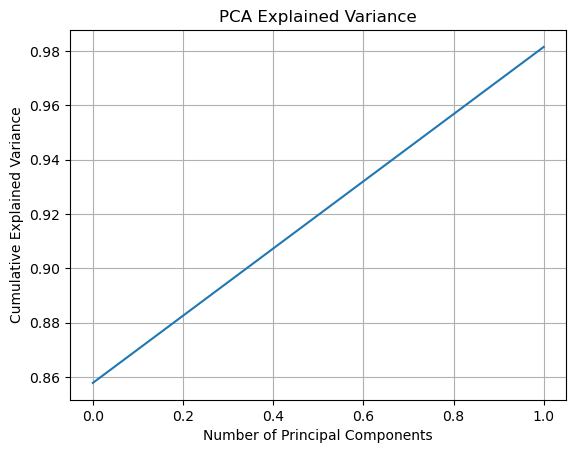

In [361]:
#Plotting the PCA graph
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

## Regression

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Various Regression Models:

In [365]:
results_regression = {}

In [366]:
# Polynomial Linear Regression & Ridge
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

poly_reg_model.fit(X_train_poly, y_train)
ridge_model.fit(X_train_poly,y_train)

results_regression['Polynomial Linear'] = {
    'Train MSE': mean_squared_error(y_train, poly_reg_model.predict(X_train_poly)),
    'Test MSE': mean_squared_error(y_test, poly_reg_model.predict(X_test_poly)),
    'Train R²': r2_score(y_train, poly_reg_model.predict(X_train_poly)),
    'Test R²': r2_score(y_test, poly_reg_model.predict(X_test_poly))}

results_regression['Polynomial Ridge'] = {
        'Train MSE': mean_squared_error(y_train, ridge_model.predict(X_train_poly)),
        'Test MSE': mean_squared_error(y_test, ridge_model.predict(X_test_poly)),
        'Train R²': r2_score(y_train, ridge_model.predict(X_train_poly)),
        'Test R²': r2_score(y_test, ridge_model.predict(X_test_poly))}

In [367]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
results_regression['Random Forest'] = {
    'Train MSE': mean_squared_error(y_train, rf_model.predict(X_train)),
    'Test MSE': mean_squared_error(y_test, rf_model.predict(X_test)),
    'Train R²': r2_score(y_train, rf_model.predict(X_train)),
    'Test R²': r2_score(y_test, rf_model.predict(X_test))}

In [368]:
# XGBoost
xg_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_model.fit(X_train, y_train)
results_regression['XGBoost'] = {
    'Train MSE': mean_squared_error(y_train, xg_model.predict(X_train)),
    'Test MSE': mean_squared_error(y_test, xg_model.predict(X_test)),
    'Train R²': r2_score(y_train, xg_model.predict(X_train)),
    'Test R²': r2_score(y_test, xg_model.predict(X_test))}

In [369]:
# SVR breaks the kernel, so I won't use it.
#poly = PolynomialFeatures(degree=1) # The kernel perma-loops after using SVR with degree 2 polynomial features
#X_train_small = X_train[-100:] # Take the last 100 rows, same reason as above
#y_train_small = y_train[-100:]

#svm_model = SVR(kernel='linear')
#svm_model.fit(X_train_small, y_train_small)
#results_regression['SVM'] = {
#    'Train MSE': mean_squared_error(y_train, svm_model.predict(X_train)),
 #   'Test MSE': mean_squared_error(y_test, svm_model.predict(X_test)),
  #  'Train R²': r2_score(y_train, svm_model.predict(X_train)),
   # 'Test R²': r2_score(y_test, svm_model.predict(X_test))}

### Printing the table of values

In [371]:
print(pd.DataFrame(results_regression).T)

                    Train MSE     Test MSE  Train R²    Test R²
Polynomial Linear    8.554486   168.562617  0.565169  -8.538209
Polynomial Ridge   145.716919  1079.758143 -6.406893 -60.098712
Random Forest        2.241654    16.047950  0.886055   0.091918
XGBoost              0.009373    14.188601  0.999524   0.197130


### Plotting the regression graphs

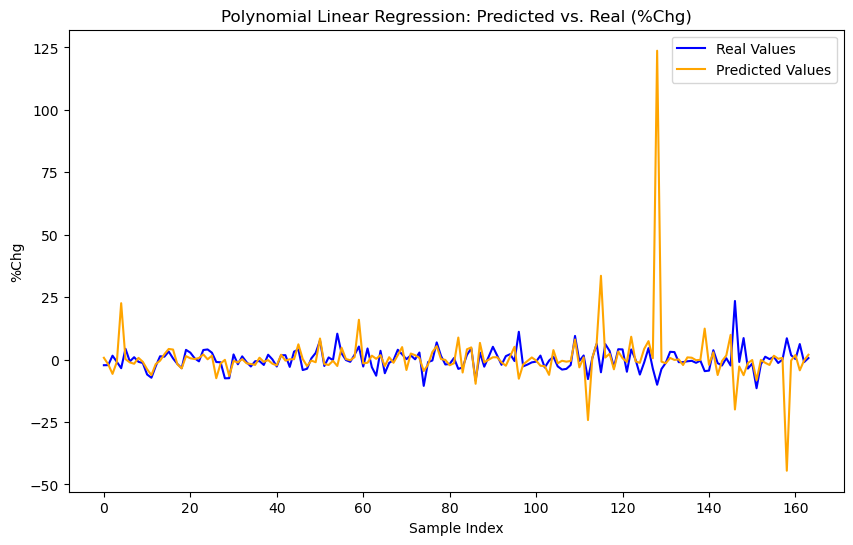

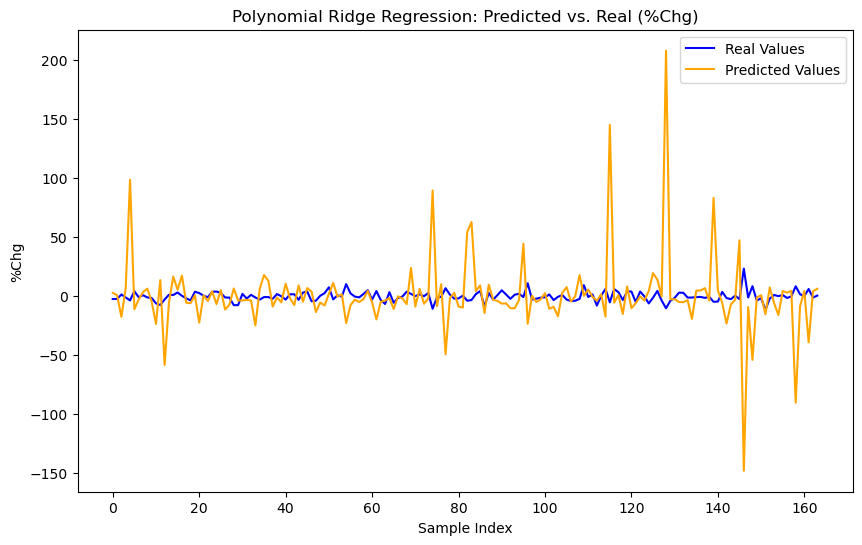

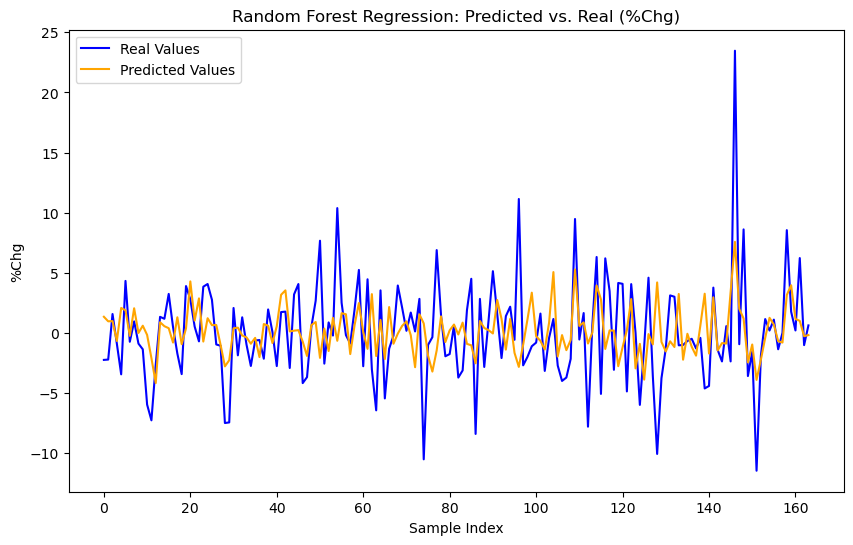

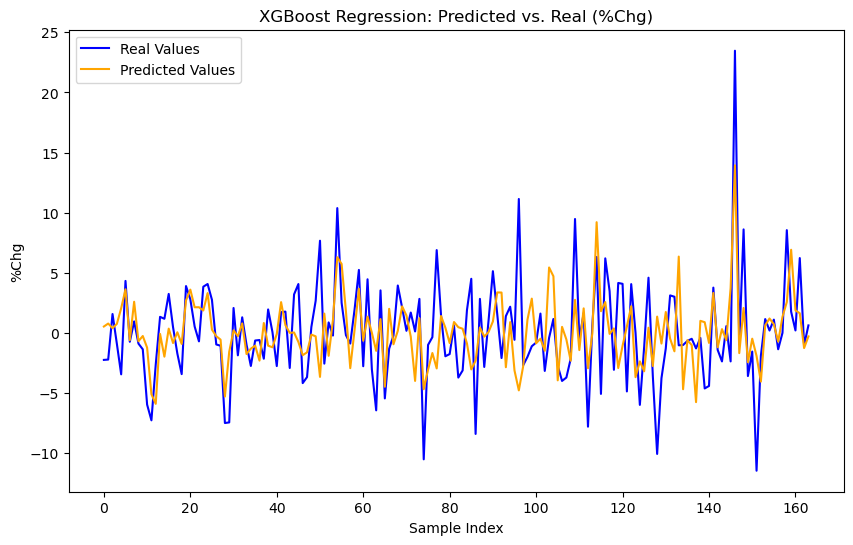

In [373]:
# Polynomial Linear Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(poly_reg_model.predict(X_test_poly), label='Predicted Values', color='orange')
plt.title('Polynomial Linear Regression: Predicted vs. Real (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

# Polynomial Ridge Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(ridge_model.predict(X_test_poly), label='Predicted Values', color='orange')
plt.title('Polynomial Ridge Regression: Predicted vs. Real (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

# Random Forest Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(rf_model.predict(X_test), label='Predicted Values', color='orange')
plt.title('Random Forest Regression: Predicted vs. Real (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

# XGBoost Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(xg_model.predict(X_test), label='Predicted Values', color='orange')
plt.title('XGBoost Regression: Predicted vs. Real (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

### Conclusions

XGBoost and Random Forest are the best. 
It is worth noting that XGBoost has a very large difference between the Train R2, and the Test R2. This is a sign of overfitting, meaning that it may have learned the training data too well, and it may not perform well on new data.

## Regression predictions

### I will use Random Forest and XGBoost

### Regression prediction using Random Forest

In [381]:
current_data = df.iloc[[-1]].copy()  # Last row of the data
last_price = current_data['PX_LAST'].values[0]  # Last price of the day

current_data = current_data.drop(['% ChangeL'], axis=1)  # Remove extra column

predictions = []  # List to store predicted prices
predicted_changes = [] # List to store predicted percent changes

# Loop to predict 30 days into the future:
for day in range(30):
    next_day_prediction = rf_model.predict(current_data)  # Prediction for the next day (percentage change)

    # Calculate the predicted price
    predicted_change_percent = next_day_prediction[0] #store the predicted change in percent.
    predicted_change = predicted_change_percent / 100 * last_price  # Convert percentage to a number.
    predicted_price = last_price + predicted_change
    predictions.append(predicted_price)
    predicted_changes.append(predicted_change_percent) #store the percent change

    next_day_data = current_data.copy()  # Creates next day's data

    # Update the data with the guesses
    next_day_data['PX_VOLUME'] = current_data['PX_VOLUME'].values[0]
    next_day_data['PX_OPEN'] = current_data['PX_LAST'].values[0]
    next_day_data['PX_HIGH'] = current_data['PX_HIGH'].values[0] + 0.5
    next_day_data['PX_LOW'] = current_data['PX_LOW'].values[0] - 0.5
    next_day_data['PX_LAST'] = predicted_price  # Use the predicted price.

    # Update the current data for the next iteration
    current_data = next_day_data
    last_price = predicted_price

# Print the predictions
print("Predictions for the stock's price and change the next 30 days, using the Random Forest model:")
for i in range(30):
    print(f"Day {i+1}: Price: {predictions[i]:.2f}, Change: {predicted_changes[i]:.2f}%") #print both.

Predictions for the stock's price and change the next 30 days, using the Random Forest model:
Day 1: Price: 85.71, Change: 0.93%
Day 2: Price: 86.51, Change: 0.93%
Day 3: Price: 87.31, Change: 0.93%
Day 4: Price: 88.12, Change: 0.93%
Day 5: Price: 88.95, Change: 0.93%
Day 6: Price: 89.82, Change: 0.98%
Day 7: Price: 90.70, Change: 0.98%
Day 8: Price: 91.75, Change: 1.15%
Day 9: Price: 92.80, Change: 1.15%
Day 10: Price: 93.87, Change: 1.15%
Day 11: Price: 94.95, Change: 1.15%
Day 12: Price: 96.04, Change: 1.15%
Day 13: Price: 97.15, Change: 1.15%
Day 14: Price: 98.27, Change: 1.15%
Day 15: Price: 99.39, Change: 1.14%
Day 16: Price: 100.52, Change: 1.14%
Day 17: Price: 101.67, Change: 1.15%
Day 18: Price: 102.84, Change: 1.15%
Day 19: Price: 104.02, Change: 1.15%
Day 20: Price: 105.21, Change: 1.15%
Day 21: Price: 106.41, Change: 1.15%
Day 22: Price: 107.63, Change: 1.15%
Day 23: Price: 108.80, Change: 1.09%
Day 24: Price: 109.99, Change: 1.09%
Day 25: Price: 111.19, Change: 1.09%
Day 2

### Regression prediction using XGBoost

In [383]:
current_data = df.iloc[[-1]].copy()  # Last row of the data
last_price = current_data['PX_LAST'].values[0]  # Last price of the day

current_data = current_data.drop(['% ChangeL'], axis=1)  # Remove extra columns

predictions = []  # List to store predicted prices
predicted_changes = [] # List to store predicted percent changes

# Loop to predict 30 days into the future:
for day in range(30):
    next_day_prediction = xg_model.predict(current_data)  # Prediction for the next day (percentage change)

    # Calculate the predicted price
    predicted_change_percent = next_day_prediction[0] #store the predicted change in percent.
    predicted_change = predicted_change_percent / 100 * last_price  # Convert percentage to a number.
    predicted_price = last_price + predicted_change
    predictions.append(predicted_price)
    predicted_changes.append(predicted_change_percent) #store the percent change

    next_day_data = current_data.copy()  # Creates next day's data

    # Update the data with the guesses
    next_day_data['PX_VOLUME'] = current_data['PX_VOLUME'].values[0]
    next_day_data['PX_OPEN'] = current_data['PX_LAST'].values[0]
    next_day_data['PX_HIGH'] = current_data['PX_HIGH'].values[0] + 0.5
    next_day_data['PX_LOW'] = current_data['PX_LOW'].values[0] - 0.5
    next_day_data['PX_LAST'] = predicted_price  # Use the predicted price.

    # Update the current data for the next iteration
    current_data = next_day_data
    last_price = predicted_price

# Print the predictions
print("Predictions for the stock's price and change the next 30 days, using the Random Forest model:")
for i in range(30):
    print(f"Day {i+1}: Price: {predictions[i]:.2f}, Change: {predicted_changes[i]:.2f}%") #print both.

Predictions for the stock's price and change the next 30 days, using the Random Forest model:
Day 1: Price: 85.09, Change: 0.20%
Day 2: Price: 85.66, Change: 0.68%
Day 3: Price: 86.24, Change: 0.68%
Day 4: Price: 86.83, Change: 0.68%
Day 5: Price: 87.41, Change: 0.68%
Day 6: Price: 89.31, Change: 2.17%
Day 7: Price: 91.25, Change: 2.17%
Day 8: Price: 93.23, Change: 2.17%
Day 9: Price: 95.26, Change: 2.17%
Day 10: Price: 97.33, Change: 2.17%
Day 11: Price: 99.45, Change: 2.17%
Day 12: Price: 101.61, Change: 2.17%
Day 13: Price: 103.81, Change: 2.17%
Day 14: Price: 106.07, Change: 2.17%
Day 15: Price: 108.37, Change: 2.17%
Day 16: Price: 110.73, Change: 2.17%
Day 17: Price: 113.14, Change: 2.17%
Day 18: Price: 115.59, Change: 2.17%
Day 19: Price: 118.11, Change: 2.17%
Day 20: Price: 121.06, Change: 2.50%
Day 21: Price: 124.08, Change: 2.50%
Day 22: Price: 127.18, Change: 2.50%
Day 23: Price: 130.36, Change: 2.50%
Day 24: Price: 133.62, Change: 2.50%
Day 25: Price: 136.96, Change: 2.50%
D

XGBoost has a constant % increase, while Random Forest's fluctuates after a while. This is probably proof that XGBoost is overfitted.

## Classification

### Prepwork

First, I need to create an appropriate column for clasification

In [388]:
df['C ChangeL'] = np.where(df['% ChangeL'] > 0, 1, 0)

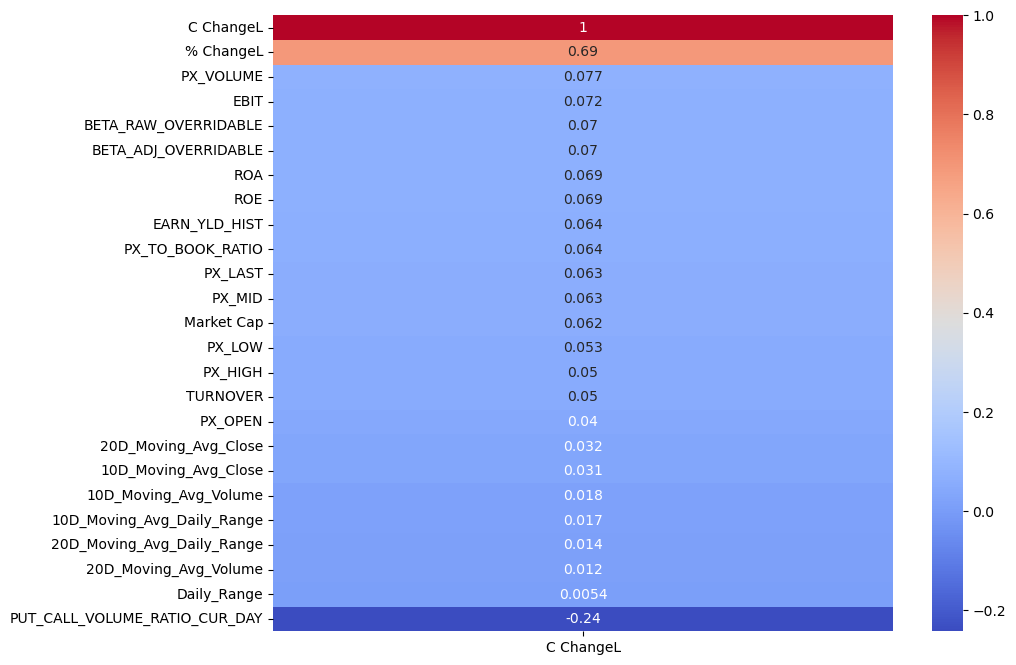

In [389]:
corr_matrix = df.corr()

# Create a heatmap of correlation with C ChangeL
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['C ChangeL']].sort_values(by='C ChangeL', ascending=False), annot=True, cmap='coolwarm')
plt.show()

In [390]:
# Exclude the '% ChangeL' column from the dataset
X = df.drop(columns=['C ChangeL', '% ChangeL'])  # Exclude both % ChangeL (target) and C ChangeL
y = df['C ChangeL']  # Target

# Step 1: Filter features based on correlation threshold (without C ChangeL)
corr_matrix = df.corr()
low_corr_threshold = 0.05  # Define a threshold for correlation
high_corr_features = corr_matrix.index[(abs(corr_matrix['C ChangeL']) >= low_corr_threshold) & (corr_matrix.index != '% ChangeL')]
low_corr_features = corr_matrix.index[(abs(corr_matrix['C ChangeL']) < low_corr_threshold) & (corr_matrix.index != '% ChangeL')]

# Separate high and low correlation features
X_high_corr = df[high_corr_features].drop(columns=['C ChangeL'])  # Keep only high-correlation features
X_low_corr = df[low_corr_features]  # Low-correlation features

# Step 2: Apply PCA to the low-correlation features
scaler = StandardScaler()  # Standardize the low-correlation features for PCA
X_low_corr_scaled = scaler.fit_transform(X_low_corr)

# Perform PCA keeping 95% of the variance
pca = PCA(n_components=0.95)
X_low_corr_pca = pca.fit_transform(X_low_corr_scaled)

# Step 3: Combine high-correlation features with PCA components
X_combined = np.hstack((X_high_corr, X_low_corr_pca))

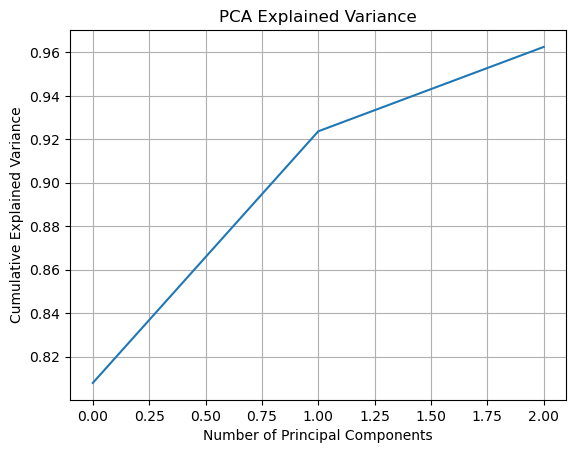

In [391]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

Declaring variables

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

### The classification models

In [395]:
results_classification = {}

In [396]:
# Polynomial Logistic Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logistic_model.fit(X_train_poly, y_train)
y_pred_logistic = logistic_model.predict(X_test_poly)

results_classification['Polynomial Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic),
    'Recall': recall_score(y_test, y_pred_logistic),
    'F1-Score': f1_score(y_test, y_pred_logistic),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_logistic)
}

In [397]:
# Polynomial Ridge Classifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

results_classification['Polynomial Ridge Classifier'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ridge),
    'Precision': precision_score(y_test, y_pred_ridge),
    'Recall': recall_score(y_test, y_pred_ridge),
    'F1-Score': f1_score(y_test, y_pred_ridge),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_ridge)
}

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.69199e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [398]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

results_classification['Random Forest Classifier'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf)
}

In [399]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

results_classification['XGBoost Classifier'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb)
}

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [400]:
# SVC
#svm_model = SVC(kernel='linear')
#svm_model.fit(X_train, y_train)
#y_pred_svm = svm_model.predict(X_test)
#
#results_classification['SVM Classifier'] = {
#    'Accuracy': accuracy_score(y_test, y_pred_svm),
#    'Precision': precision_score(y_test, y_pred_svm),
#    'Recall': recall_score(y_test, y_pred_svm),
#    'F1-Score': f1_score(y_test, y_pred_svm),
#    'Confusion Matrix': confusion_matrix(y_test, y_pred_svm)
#}

### Printing the results

In [402]:
print(pd.DataFrame(results_classification).T)

                                Accuracy Precision    Recall  F1-Score  \
Polynomial Logistic Regression  0.457317  0.457317       1.0  0.627615   
Polynomial Ridge Classifier      0.79878    0.7625  0.813333  0.787097   
Random Forest Classifier        0.573171  0.534247      0.52  0.527027   
XGBoost Classifier              0.634146   0.60274  0.586667  0.594595   

                                    Confusion Matrix  
Polynomial Logistic Regression    [[0, 89], [0, 75]]  
Polynomial Ridge Classifier     [[70, 19], [14, 61]]  
Random Forest Classifier        [[55, 34], [36, 39]]  
XGBoost Classifier              [[60, 29], [31, 44]]  


#### Polynomial Ridge Classifier seems to be the best overall. PLR has a recall of 1.0, but low precision. This means that it almost always predicts the stock will go up.

## Classification Predictions

### I will use the Polynomial Ridge Classifier

In [432]:
X_combined = df.drop(['% ChangeL', 'C ChangeL'], axis=1)
print(X_combined.columns)

NameError: name 'X_trained' is not defined

In [450]:
current_data = df[['PX_OPEN', 'PX_LAST', 'PX_LOW', 'PX_HIGH', 'PX_MID', 'PX_VOLUME', 'TURNOVER', 'Market Cap', 'PX_TO_BOOK_RATIO', 'EBIT', 'ROE', 'ROA', 'EARN_YLD_HIST', 'PUT_CALL_VOLUME_RATIO_CUR_DAY', 'BETA_ADJ_OVERRIDABLE', 'BETA_RAW_OVERRIDABLE']].iloc[[-1]].copy()
current_data_poly = poly.transform(current_data)

predictions = []  # List to store predictions (1 or 0)

# Loop to predict 30 days into the future:
for day in range(30):

    next_day_prediction = ridge_model.predict(current_data_poly)  # Prediction for the next day (1 or 0)
    predictions.append(next_day_prediction[0])

    next_day_data = current_data.copy()  # Creates next day's data

    # Update the data with the guesses
    next_day_data['PX_VOLUME'] = current_data['PX_VOLUME'].values[0]
    next_day_data['PX_OPEN'] = current_data['PX_LAST'].values[0]
    next_day_data['PX_HIGH'] = current_data['PX_HIGH'].values[0] + 0.5
    next_day_data['PX_LOW'] = current_data['PX_LOW'].values[0] - 0.5

    # If the model predicts "up" (1), increase the last price a little
    # If the model predicts "down" (0), decrease the last price a little
    if next_day_prediction[0] == 1:
        next_day_data['PX_LAST'] = current_data['PX_LAST'].values[0] + 0.5
    else:
        next_day_data['PX_LAST'] = current_data['PX_LAST'].values[0] - 0.5

    # Transform the next day's data
    next_day_data_poly = poly.transform(next_day_data)

    # Update the current data for the next iteration
    current_data = next_day_data
    current_data_poly = next_day_data_poly

# Print the predictions
print("Predictions for the stock's direction (1=up, 0=down) for the next 30 days, using the Polynomial Ridge Classifier:")
for i, prediction in enumerate(predictions):
    print(f"Day {i+1}: {prediction}")

Predictions for the stock's direction (1=up, 0=down) for the next 30 days, using the Polynomial Ridge Classifier:
Day 1: 1
Day 2: 1
Day 3: 1
Day 4: 1
Day 5: 1
Day 6: 1
Day 7: 1
Day 8: 1
Day 9: 1
Day 10: 1
Day 11: 1
Day 12: 1
Day 13: 1
Day 14: 1
Day 15: 1
Day 16: 1
Day 17: 1
Day 18: 1
Day 19: 1
Day 20: 1
Day 21: 1
Day 22: 1
Day 23: 1
Day 24: 1
Day 25: 1
Day 26: 1
Day 27: 1
Day 28: 1
Day 29: 1
Day 30: 1


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without

So... it always predicts 1...